# Chapter 5 Analyzing Microarray Data with R 用r分析微阵列数据

> - *定义* ：DNA微阵列（DNA microarray）又称DNA阵列或DNA芯片，比较常用的名字是基因芯片（gene chip）。是一块带有DNA微阵列（microarray）的特殊玻璃片或硅芯片片，在数平方公分之面积上布放数千或数万个核酸探针；检体中的DNA、cDNA、RNA等与探针结合后，借由荧光或电流等方式侦测。经由一次测验，即可提供大量基因序列相关信息。它是基因组学和遗传学研究的工具。研究人员应用基因芯片就可以在同一时间定量的分析大量（成千上万个）的基因表达，具有快速、精确、低成本之生物分析检验能力。  
- *原理*：DNA微阵列的核心原理为两股DNA之间的杂交，透过互补的核酸序列配对专一性在互补的核酸碱基对间产生氢键键结。在核苷酸序列中大量互补的碱基对以非共价键键结方式的两股更紧密地结合。杂交后洗去非专一性键结序列，只留下有效配对的两股。目标序列上产生萤光讯号在探针序列上，建立于在杂交条件(例如温度)和杂交清洗后键结。讯号的总强度来自一个点，取决于目标样品与该点结合探针的量。微阵列利用相对定量，比较相同讯号强度在不同条件下和已知位点的讯号强度。
- *本章内容*：在这一章中，我们主要关注用核酸来测量基因表达的微阵列采样并使用Affymetrix CEL文件数据进行解释。本章讲解：读取和加载微阵列数据，预处理，分析，挖掘，最后，它的可视化使用R .然后，解决方案有关生物利用的数据将会介绍。

---

## *1 Reading CEL files*

- CEL文件包含数组中像素的所有强度相关信息。这些文件包括强度本身、标准偏差、像素数量和其他元信息。

- 必须将CEL文件读入在R工作区中以可操作的格式获取数据。本节将解释我们如何阅读R工作空间中的这样一个文件。

---

（1）从NCBI数据库下载cel文件，下载并加载affy包

In [1]:
library(affy)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; vie

(2)读取下载的cel文件。

In [2]:
myData <- ReadAffy(celfile.path="/Users/luxuanyi/GSE24460_RAW")
myData

Warning message:
“replacing previous import ‘AnnotationDbi::tail’ by ‘utils::tail’ when loading ‘hgu133a2cdf’”
Warning message:
“replacing previous import ‘AnnotationDbi::head’ by ‘utils::head’ when loading ‘hgu133a2cdf’”




AffyBatch object
size of arrays=732x732 features (19 kb)
cdf=HG-U133A_2 (22277 affyids)
number of samples=4
number of genes=22277
annotation=hgu133a2
notes=

- 仅读取某个或者某几个文件

In [3]:
 myData1 <- ReadAffy(filenames = GSM602658_MCF71.CEL.gz )

ERROR: Error in AllButCelsForReadAffy(..., filenames = filenames, widget = widget, : 找不到对象'GSM602658_MCF71.CEL.gz'


---

## *2 Building the ExpressionSet object构建ExpressionSet对象*

- Bioconductor中的ExpressionSet类表示几种不同类型的组合将信息源转换为一个数据结构。对于一个数组，它包含强度，表型数据、实验信息以及注释信息。

- 当我们使用ReadAffy或read.affyBatch读取一组CEL文件时，就会创建一个扩展ExpressionSet结构的affyBatch对象。 AffyBatch对象是探针级别的数据，而ExpressionSet是probeset级别的数据，它通过AffyBatch扩展到探测级别。有时，我们用表格、矩阵或数据的形式表示强度值与表型数据、实验细节和注释一起作为单独的对象(或文件)。我们必须从零开始从这些单独的文件创建ExpressionSet对象，以方便分析工作

- 我们需要包含不同类型信息的文件，例如分析数据、表型元数据、特征注释和元数据，以及实验的描述。我们通过简单地将上一个配方中创建的myData对象所需的组件写入不同的文件来创建这些文件。我们需要芯片
这方面的注释信息。

(1)加载biobase包

In [ ]:
 library(Biobase)

（2）作为演示表达式文件和表现型数据(pData)文件，我们将使用
内置的数据为生物数据库，其位置可以获取如下

In [ ]:
DIR <- system.file("extdata", package="Biobase")

exprsLoc <- file.path(DIR, "exprsData.txt")

pDataLoc <- file.path(DIR, "pData.txt")

（3）使用常规方法从包含表达式值的文本文件中读取表阅读。表格或read.csv功能如下

In [ ]:
 exprs <- as.matrix(read.csv(exprsLoc, header = TRUE, sep ="\t", row.names = 1, as.is = TRUE))

In [ ]:
class(exprs)
dim(exprs) #检查一下，结果应为矩阵

（4）现在，使用read.csv以类似的方式读取表现型信息文件函数如下:

In [ ]:
pData <- read.table(pDataLoc, row.names = 1, header = TRUE, 
sep = "\t")
pData <- new("AnnotatedDataFrame", data = pData)

（5）编译实验信息，一个对象的MIAME类与插槽
研究员姓名、实验室名称等如下:

In [ ]:
 exData <- new("MIAME", name="ABCabc", lab="XYZ Lab", contact="abc@xyz", title="", abstract="", url="www.xyz")

（6）了解chip注释也很重要，因为它是ExpressionSet的一部分
对象。为此使用hgu95av2芯片注释。

（7）现在，使用编译后的信息创建一个新的ExpressionSet对象
之前的步骤如下:

In [ ]:
exampleSet <- new("ExpressionSet", exprs = exprs, phenoData = pData, experimentData = exData, annotation = "hgu133a2")

In [ ]:
str (exampleSet) #要检查对象，只需键入对象名或用str函数如下:

（8）在继续分析之前，测试所创建对象的有效性，如下:

In [ ]:
 validObject(exampleSet)

（9）要将AffyBatch对象转换为ExpressionSet，只需使用AffyBatch
组件直接创建一个新的ExpressionSet对象，如步骤5所示。

----

## *3 Handling the AffyBatch object*

- AffyBatch文件可以通过读取cel文件和其他的分配信息一起创建。AffyBatch有很多种组件，

（1）将使用AffyBatch来创建前面读取的cel文件(myData)

- 所以现在先check一下myData

In [ ]:
library(affy)
myData <- ReadAffy(celfile.path="/Users/luxuanyi/GSE24460_RAW")
myData 
str(myData)  #. Check the structure of the object as follows:

(2)用表现型的数据返回一下myData，使用pData和phenoData函数

In [ ]:
pData(myData)
phenoData(myData)

（3）将表达式数据作为矩阵，使用exprs函数如下:（可以使用write.csv函数将这些值写入单独的文件。）

In [ ]:
exprs(myData)

（4）注释用annotation

In [ ]:
 annotation(myData)

(5)要获取数据中的探测名称或示例名称，请使用probeNames和
sampleNames函数如下:

In [ ]:
probeNames(myData)
sampleNames(myData)

>AffyBatch对象有一个由许多组件和子组件组成的复杂结构，正如在查看对象结构时所观察到的那样。
在配方的每个步骤中，我们检查完整AffyBatch对象的各个组件。
AffyBatch对象的组件(如表达式数据)可以使用write.csv或类似的函数提取并写入一个单独的文件。

---

## *4.Checking the quality of data*

- 微阵列实验流水线的每一步都会影响数据的质量。与质量相关的问题可能源于杂交，因为芯片上的荧光不均匀导致了强度分布的变化。另一种可能的情况是不适当的实验设计，可能影响整个数据集。在数据分析过程中使用这些数据会导致错误的或非结论性的推论。作为分析人员，我们必须在开始数据分析之前确保数据质量。这是通过查找外部数组、数组中的分布、批处理效果等来实现的。有各种各样的分析和诊断图可以用来计算这些度量，这些度量可以解释分析中的数组数据的质量。此配方将解释用于数据质量检查的各种诊断步骤。

(1)Install and load the    arrayQualityMetrics

In [ ]:
BiocManager::install("arrayQualityMetrics")
library(arrayQualityMetrics)

(2)使用以下arrayQualityMetrics函数创建绘图来评估数据质量:(myData是之前的数据）在当前工作目录的子目录中检查创建的html页面和图

In [ ]:
arrayQualityMetrics(myData, outdir="quality_assesment")

In [ ]:
browseURL(file.path("quality_assesment", "index.html"))  #Open the HTML file in a browser

- 您也可以单独创建这些图和评估。例如,要创建一个MAplot，使用MAplot函数如下

In [ ]:
MAplot(myData, pairs=TRUE, plot.method="smoothScatter")

>  MA图是从Bland Altman 图的派生图，它基于M\A。 M表示两个数组之间的比率，从而指示在给定的位置上哪种颜色的绑定更多。A表示对当场的log2转换强度的度量。在二维空间中绘制这两个分量(通常是M沿y轴和A沿x轴)可以让我们了解数据中的强度偏差。
这意味着两个通道或两个数组中的差异有助于检测背景或异常值。例如，我们可以用它们来对阵列进行两两比较，或在双通道数据中比较两种染料的强度。偏离M=0线(沿M=0的不对称分布)表示强度偏差、离群值，甚至差异表达(DE)基因。通过归一化，可以在一定程度上纠正图中的偏差。(事实上，它常常与箱线图一起用作规范化的指标，稍后将对此进行讨论。)趋势在左边(下A)表示背景的存在，而趋势在右边(较高的A)表示饱和度。图中的大多数点通常在M=0线附近，且四分位间很小范围横跨阵列，并可能代表无差异表达(非DE)基因。然而，只有经过背景校正才能得出这样的结论和规范化。



- 绘制密度图

In [ ]:
plotDensity.AffyBatch(myData)

- 这类图显示数据密度估计值的强度图。像样的数据在数组中具有类似的形状和范围。这个图给出了数据中不同类型的信息。高背景噪声的数据会使整个分布向右偏移。如果分布显示一个缩小的右尾巴，这表明信号的损失。分布的上部凸起表明信号饱和。图中的多模态形状(即多个模式已经达到峰值)说明了空间伪迹(如阵列中的区域偏差)。

- 绘制箱式图

In [ ]:
boxplot(myData)

- 高质量数据的箱形图显示了相似的宽度和位置，代表了数据中信号强度的分布。
分布通常在对数尺度上进行，以使图可读。
箱线图上的一个主要偏差可能代表该特定阵列中的一个实验缺陷或噪声。
这些分布的Kolmogorov Smirnov (KS)统计量用于检测数据中的异常值。
箱线图的另一个重要特性是，在大多数情况下，数据的标准化可以克服偏差.

- 为了得到RNA降解图，使用AffyRNAdeg函数，然后
plotAffyRNAdeg如下:

In [ ]:
rnaDeg <- AffyRNAdeg(myData)
plotAffyRNAdeg(rnaDeg)

-检查rna降解图的对象内容细节

In [ ]:
 summaryAffyRNAdeg(rnaDeg)

- RNA降解图为阵列杂交样品的质量提供了一个指标。
一般来说，信使rna有一定的寿命，在此之后它们会被降解，因此不能有效地测量表达水平。
降解从5'端开始向3'端移动。
因此，作为这种降解的影响，强度在5'端应低于3'端。阵列上所有探针的表达式(强度测量)给出了样品的降解程度。
我们将其表示为RNA降解图，其中探针按顺序从分子的5'端到3'端编号。
因此，绘制强度应该显示出沿着探针数的上升趋势(在5'端有更多的衰减，因此强度较低，反之亦然)。
在这个配方中，我们检查了图中的线条是否遵循一致的趋势。
一个偏差表明杂交用的样品有问题。

 ---

> ArrayQualityMetrics函数获取数据并对其执行不同类型的检查。
这些检查包括阵列之间的距离测量、主成分分析(PCA)、密度图、MA图和RNA降解图。
阵列之间的离群点检测通过阵列之间的距离、箱形图和MA图等测量值来反映。
详细的描述可以在生成的HTML文件中找到。
例如，测量数组i和j之间的距离dij，我们可以使用以下公式: 

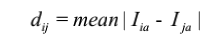

> 上述两个ia、ja分别是数组i、j中对探针强度的测量

---

## *5.Generating artificial expression data*

- 生成良好的特征，合成数据集，允许彻底
需要以快速和可重复的方式对学习算法进行测试。
为了达到这种目的，通常使用模拟数据(人工)集。

- 在我们开始生成人工数据之前，我们必须知道我们希望我们的数据在界限(上下)、DE基因的分数、数据量和相关的统计参数方面如何显示，

（1）下载和加载madsim包

In [ ]:
library("madsim")

(2)现在，为整个模拟过程定义第一组参数,统计参数及阵列分布如下:

In [ ]:
 fparams <- data.frame(m1 = 7, m2 = 7, shape2 = 4, lb = 4, ub = 14, pde = 0.02, sym = 0.5)

(3)定义由以下统计参数组成的第二组参数, 定义基因的表达水平如下:

In [ ]:
dparams <- data.frame(lambda1 = 0.13, lambda2 = 2, muminde = 1, sdde = 0.5)
sdn <- 0.4
rseed <- 50

(4)然后，在表达数据中定义需要的基因数量如下:

In [ ]:
 n <- 35000

(5)现在，生成如下合成数据:

In [ ]:
myData3 <- madsim(mdata=NULL, n=35000, ratio=0, fparams, dparams, sdn, rseed)

(6)观察madsim创建的对象的结构

In [ ]:
str(myData3)

(7)若要可视化数据，请为任何示例(例如#sample 1)创建一个主图，使用以下功能:

In [ ]:
library(limma)
plotMA3(myData[[1]], 1)

> madsim包在统计参数已知的情况下，生成两种生物学条件的数据。
madsim模型中使用的参数允许用户生成具有不同特征的数据。
他们使用以下四种成分来生成基因的表达值: 1) 差异基因的表达水平。2）非差异基因的表达水平。3）基因表达“噪音”:一般都来自于有些细胞的等位基因。就是所有的细胞都在表达一种蛋白，而有一两个细胞在表达另一种，与整体有差异，就可以叫noise
noise一般是这种单细胞水平研究的一个重要的突破口。 4) 技术误差。

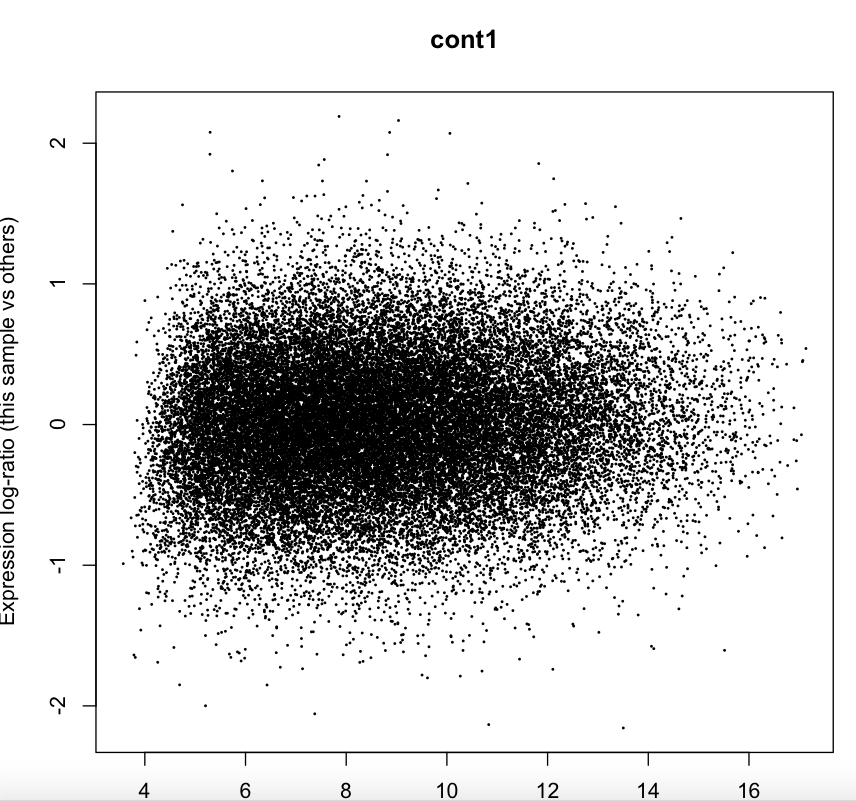

---

## *6.Data normalization*

- 微阵列是同时测量数千个基因表达水平的高通量方法。
每个样本接受不同的条件。
RNA数量或/和实验误差的微小差异可能导致强度水平从一个复制到另一个。
这可能与基因的生物学表达无关。
处理这个固有的问题需要对数据进行规范化。
这最小化了技术效果，使数据具有可比性。
本节将探讨R中为数据规范化而开发的许多规范化方法中的几个。

- 首先，我们需要将数据定义为ExpressionSet或AffyBatch对象。

In [ ]:
library(affy)

In [ ]:
myData <- ReadAffy(celfile.path="/Users/luxuanyi/GSE24460_RAW")
myData

### we focus on three methods: the vsn, loess, and quantile normalizations.

---

#### 1  *vsn* (Variance Stabilization and Normalization )normalization

(1) install and load it 

In [ ]:
library(vsn)

(2)将AffyBatch对象执行vsn归一化:

In [ ]:
myData.VSN <- normalize.AffyBatch.vsn(myData)

(3)创建箱式图来规范化数据，并且将其与上一节的非标准化数据的箱式图比较

In [ ]:
 boxplot(myData.VSN)

> 方差稳定和归一化(VSN)是基于假设的
微阵列数据的方差依赖于信号强度，存在一个使方差近似恒定的变换。
这意味着vsn方法对数据中的强度测度进行变换，使强度的方差近似独立于其均值。
AffyBatch.vsn函数实际上是vsn库(而不是affy库)中vsn函数的包装器。

---

#### 2 *loess*  normalization

(1) 使用affy库，将数据归一化

In [ ]:
 myData.loess <- normalize.AffyBatch.loess(myData)
 boxplot(myData.loess)

>使用局部加权回归对数据进行归一化。
该方法适合于数据集的平滑曲线。
平滑程度由窗宽参数决定。
窗宽越大，曲线越平滑;窗宽越小，曲线的局部变化越大。
AffyBatch.loess函数利用R来对数据进行拟合和平滑
默认情况下使用的窗口大小是2/3，但是可以使用span参数进行修改。

---

#### 3 *quantile* normalization

(1)使用affy库，归一化

In [ ]:
myData.quantile <- normalize.AffyBatch.quantiles(myData)
boxplot(myData.quantile)

>分位数归一化使用了一个更简单的概念，即调整数组中分布的分位数，使所有的分位数相似，并形成一个共同的中位数中心。
这使得阵列的直方图看起来很像


> 如果数据只是强度矩阵，可以使用loess\quantile 来进行标准化

>对归一化后的数据进行第二轮质量检查，观察归一化后的效果，方法与使用arrayQualityMetrics之前相同。

---

## 7.Overcoming batch effects in expression data

- 批量效应是指样品在不同批次加工过程中产生的系统误差。
它们代表了实验中样本间的非生物差异。
其原因可能是样品制备或杂交方案等方面的差异。
在一定程度上，可以通过仔细的实验设计来减少它，但不能完全消除它，除非研究是在单个批次下进行的。
批处理效果使得合并来自不同批的数据的任务变得困难。这最终降低了数据统计分析的能力。
这需要适当的预处理前，批是组合。
本节将介绍这些预处理技术。

- 本节将需要一个数据集，显示批处理效果，没有任何预处理。
我们考虑的是bladderbatch的数据，它由5个批次组成。
数据是bladderbatch包的一部分。

(1)装载 sva包、bladderbatch包

In [ ]:
library(sva) # contains batch removing utilities
library(bladderbatch) # The data to be used

(2)加载bladderbatch数据

In [ ]:
data(bladderdata)

(3)从其中提取表达式矩阵和pheno数据如下:

In [ ]:
pheno <- pData(bladderEset)
edata <- exprs(bladderEset)

(4)开始处理数据之前，先看看表型信息(pheno)


In [ ]:
pheno

(5)以看到前8个样品是正常的细胞，但分成了两批(批号2及3)。用这八个样本来演示如何去除批处理的效果。

In [ ]:
myData <- bladderEset[,sampleNames(bladderEset)[1:8]]

（6）要查看批处理效果，请对数据执行质量检查。

In [ ]:
 arrayQualityMetrics(myData, outdir="qc_be")

- 看看热图和聚类树产生的样本检查批处理效果

(7)现在，按照以下步骤为数据集创建模型矩阵
(注意，由于数据只有一个条件，模型矩阵中只使用了第一列和第三列):

In [ ]:
 mod1 <- model.matrix(~as.factor(cancer), data=pData(myData))[,c(1,3)]

(8)定义批次

In [ ]:
 batch <- pData(myData)$batch

(9)从表达式集对象myData中提取表达式矩阵，其中
需要去除批量效应

In [ ]:
 edata <- exprs(myData)

(10)以上完成后，进行 ComBat 功能

In [ ]:
combat_edata <- ComBat(dat=edata, batch=batch, mod=mod1, numCovs=NULL, par.prior=TRUE)

（11）创建一个表达式集对象，将所有内容作为原始输入数据，
除了表达式矩阵——它被作为结果接收的矩阵所取代
最后一步的作战功能如下:

In [ ]:
myData2 <- myData
exprs(myData2) <- combat_edata


（12）重新运行以下arrayQualityMetrics函数来检查
用这个新对象作为输入来消除批处理效果:

In [ ]:
 arrayQualityMetrics(myData2, outdir="qc_nbe")

(13)再来看看前面生成的热图和聚类树
函数并检查数据中的批处理效果是否已消除。

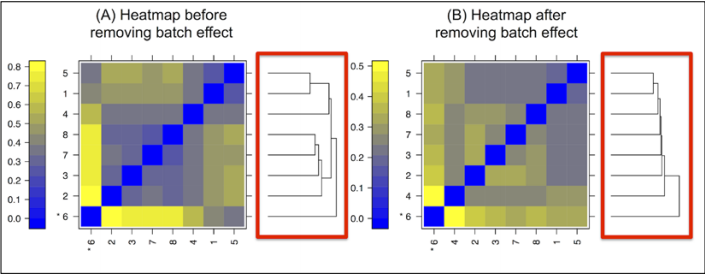

>该函数接受包含表达式值的数据矩阵批处理。输入数据中每个样本的编号，以及表示样本信息的模型矩阵。ComBat 函数使用经验贝叶斯方法来合并批次。
它独立地估计每批基因的位置和规模调整(LS)的参数。
将每一批中多个基因的信息汇集起来，就会得出具有相似表达的基因所遵循的模式。
然后这些信息被用来调整批次
以消除批量效应。
热图中的模式可能显示两个因素:预期的生物效应或非预期的批量效应。
在热图和聚类树中可以观察到批次。
我们可以看到每个批次的分支以及不同的颜色模式，而在运行战斗功能后，这些分支在集群树合并。


---

## 8.An exploratory analysis of data with PCA 主成分分析方法对数据的探索性分析

- 降维以解释和图形化数据。组织和组合这些特性以解释数据中的最大可变性有助于实现这一目标。主成分分析(PCA)是一种通过执行因子间协方差分析来实现这一目的的方法。这将找到表示数据的正交组件和表示特征更扩展的维度的每个组件(称为主组件)。
因此，PCA将数据投射到更低的维度空间中，可以作为一种探索性的方法
方法，以服务于在数据中寻找模式和减少误差等目的。

（1）用之前章节的数据

In [5]:
library(affy)
myData <- ReadAffy(celfile.path="/Users/luxuanyi/GSE24460_RAW")

(2)选择需要分析的数据

In [6]:
myData.pca <- exprs(myData)

(3)将矩阵转置得到基因特征作为列

In [8]:
myPca <- prcomp(myData.pca, scale=TRUE)
summary(myPca)  #查看主要的组成成分

Importance of components:
                          PC1     PC2     PC3     PC4
Standard deviation     1.9305 0.46011 0.17821 0.17182
Proportion of Variance 0.9317 0.05293 0.00794 0.00738
Cumulative Proportion  0.9317 0.98468 0.99262 1.00000

(4)为数据中的每个样本创建一个颜色向量

In [9]:
colors <- c("green","cyan","violet","magenta")

(5)用pairs画出主要成分的图表

In [2]:
pairs(myPca$x, col=colors)

ERROR: Error in pairs(myPca$x, col = colors): 找不到对象'myPca'


---

> 通过prcomp函数进行主成分分析计算，对数据矩阵进行主成分分析。
它返回主成分，它们的标准差，旋转。

----

## 9.Finding the differentially expressed genes发现差异表达的基因

- 在基因组水平上，每个细胞的含量是相同的，这意味着相似的基因存在于相似的细胞中(少数例外)。
由此产生的问题是，是什么使细胞(例如，对照和处理过的样本)彼此不同?
这是我们在做微阵列实验时经常遇到的问题。
差异基因表达的概念是这个问题的答案。
众所周知，每个细胞中只表达一小部分基因组，这种基于细胞类型的基因选择性表达现象是差异基因表达概念背后的基础。
因此，在一个特定的细胞中发现哪些基因表现出不同的表达是很重要的。
这是通过将被研究的细胞与通常被称为对照的参考细胞进行比较来实现的。
该节将解释如何找到一个细胞的DE基因基于表达水平的控制和治疗细胞。

- 这种方法需要处理和控制样本的规范化表达数据。
对于这样的分析目的，更多的重复次数在统计上总是相关的。
必须指出的是，对于任何微分表达式分析，我们总是使用规范化数据。
如前所述，规范化使数组具有可比性，因此，使用这种转换后的数据来发现差异，使处理过程无偏倚且科学合理。
在这个配方中，我们将使用分位数标准化数据。
除此之外，我们还需要实验和表现型细节，它们是affyBatch或ExpressionSet对象的一部分。
我们还将介绍R文库limma，它包含了R中最流行的用于差异基因表达分析的方法之一。
为了演示，我们将使用来自antiProfilesData包的正常结肠癌预处理affy数据。

(!)安装加载limma包，还需要加载 affy antiProfilesData affyPLM 

In [ ]:
library(affy)  # Package for affy data handling

library(antiProfilesData) # Package containing input data

library(affyPLM)  # Normalization package for eSet

library(limma) # limma analysis package

(2)从antiProfilesData包中获取数据(结肠癌数据),前16个样本分别代表正常和肿瘤
样本(每个8个)

In [5]:
data(apColonData)
myData <- apColonData[, sampleNames(apColonData)[1:16]]
myData_quantile <- normalize.ExpressionSet.quantiles(myData)

(3)根据实验细节和表型数据，编制设计矩阵如下

In [ ]:
design <- model.matrix(~0 + pData(myData)$Status)
design

(4)利用表达式数据和设计矩阵拟合线性模型如下:

In [8]:
fit <- lmFit(myData_quantile,design)
fit

An object of class "MArrayLM"
$coefficients
             pData(myData)$Status
1555078_at             -0.3891325
238493_at               0.3318299
1562133_x_at           -0.3822317
1559616_x_at           -0.9623383
235687_at              -0.6461947
5334 more rows ...

$rank
[1] 1

$assign
[1] 1

$qr
$qr
  pData(myData)$Status
1            -2.828427
2             0.000000
3             0.000000
4             0.000000
5             0.000000
11 more rows ...

$qraux
[1] 1

$pivot
[1] 1

$tol
[1] 1e-07

$rank
[1] 1


$df.residual
[1] 15 15 15 15 15
5334 more elements ...

$sigma
  1555078_at    238493_at 1562133_x_at 1559616_x_at    235687_at 
   0.3893793    1.3899476    0.4058717    0.6304099    0.6146187 
5334 more elements ...

$cov.coefficients
                     pData(myData)$Status
pData(myData)$Status                0.125

$stdev.unscaled
             pData(myData)$Status
1555078_at              0.3535534
238493_at               0.3535534
1562133_x_at            0.3535534
1559616_

(5)一旦你有一个线性模型拟合，计算它的调节统计数据使用
ebay函数

In [9]:
fitE <- eBayes(fit)

(6)输出可以进行排序，从输出中提取排名最高的基因如下

In [1]:
tested <- topTable(fitE, adjust="fdr", sort.by="B", number=Inf)
tested

ERROR: Error in topTable(fitE, adjust = "fdr", sort.by = "B", number = Inf): 没有"topTable"这个函数


(7)若要添加p值的条件或其他条件以获得差异表达的基因，可扩展前面的步骤如下:

In [14]:
 DE <- x[tested$adj.P.Val<0.01,]
 dim[DE]

ERROR: Error in x[tested$adj.P.Val < 0.01, ]: 量度数目不对


In [16]:
 DE <- x[tested$adj.P.Val< 0.01 & abs(x$logFC) >2,]

ERROR: Error in x$logFC: $ operator is invalid for atomic vectors


> limma文库是用来分析基因表达微阵列数据的，特别是其用途
用于分析基因表达数据的线性模型。limma这个术语代表线性模型
微阵列数据。
它实现了微阵列数据线性建模的几种方法，可以用来识别DE基因。
本配方中描述的方法首先适用于给定一组数组的数据中每个基因的线性模型。
在此基础上，采用经验贝叶斯方法对微分表达式进行了评价。它以p值、对数倍变化等形式计算统计测试和相应的分数。
我们使用的lmFit函数的输入是表达式数据(一个矩阵)和设计矩阵。
但是，输入也可以是ExpressionSet。另一件重要的事情是
必须提到的是，我们在这里手工分配设计的矩阵来说明基于数据的知识。
然而，设计矩阵也可以直接创建
表型数据如下:

In [17]:
design <- model.matrix(~-1 + factor(pData(myData_quantile)$type))

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


---

## 10.Working with the data of multiple classes 处理多个类的数据

- 我们将使用另一个来自白血病集包的数据集的数据
这些数据来自60个骨髓样本的患者患有四种主要类型的白血病
(ALL、AML、CLL和CML)和非白血病对照。出于演示目的，
我们将只使用这三个类别中的三个样本。

- 主要集中在创建比较的设计矩阵，
这是关键的区别。用三个条件和成对的假想数据来说明这一点

（1）加载leukemiasEset包，并加载出数据集。

In [ ]:
BiocManager::install("leukemiasEset")
library(leukemiasEset)
data(leukemiasEset)

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'leukemiasEset'

Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  download from 'https://cran.r-project.org/src/contrib/PACKAGES' failed”
Warning message:
“unable to access index for repository https://cran.r-project.org/bin/macosx/el-capitan/contrib/3.6:
  download from 'https://cran.r-project.org/bin/macosx/el-capitan/contrib/3.6/PACKAGES' failed”
installing the source package ‘leukemiasEset’




(2)定义三个条件，每个条件有两个副本

In [19]:
 pheno <- pData(leukemiasEset)

(3)从每个集合中选择三个样本(这里使用相应的索引)

In [20]:
 myData <- leukemiasEset[, sampleNames(leukemiasEset)[c(1:3, 13:15, 25:27, 49:51)]]

(4)根据条件变量创建设计矩阵，
利用表型数据如下:

In [22]:
 design <- model.matrix(~0 + factor(pData(myData)$LeukemiaType))

In [24]:
 colnames(design) <- unique(as.character(pData(myData)$LeukemiaType)) #. Rename the columns of the design matrix as follows:

In [27]:
 design #查看设计的矩阵 前三列是不同类型的白血病和第四是对照组非白血病样本

,ALL,AML,CLL,NoL
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0
10,0,0,0,1


(5)现在，通过拟合一个线性模型的数据如下

In [30]:
fit <- lmFit(myData, design)
fit

An object of class "MArrayLM"
$coefficients
                     ALL      AML      CLL      NoL
ENSG00000000003 3.478096 3.435959 3.608932 3.860124
ENSG00000000005 3.540522 3.332321 3.379161 3.278787
ENSG00000000419 9.083140 9.124083 9.639916 9.551689
ENSG00000000457 4.865089 6.217431 5.838287 5.503014
ENSG00000000460 4.294320 3.979242 3.612462 5.218094
20167 more rows ...

$rank
[1] 4

$assign
[1] 1 1 1 1

$qr
$qr
         ALL        AML       CLL       NoL
1 -1.7320508  0.0000000  0.000000  0.000000
2  0.5773503 -1.7320508  0.000000  0.000000
3  0.5773503  0.0000000 -1.732051  0.000000
4  0.0000000  0.5773503  0.000000 -1.732051
5  0.0000000  0.5773503  0.000000  0.000000
7 more rows ...

$qraux
[1] 1.57735 1.00000 1.00000 1.00000

$pivot
[1] 1 2 3 4

$tol
[1] 1e-07

$rank
[1] 4


$df.residual
[1] 8 8 8 8 8
20167 more elements ...

$sigma
ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
      0.2263650       0.1942866       0.6732108       0.4570501   

(6)对于成对比较，创建一个如下的对比矩阵

In [31]:
contrast.matrix <- makeContrasts(NoL- ALL, NoL- AML, NoL- CLL, 
levels = design)
contrast.matrix

,NoL - ALL,NoL - AML,NoL - CLL
ALL,-1,0,0
AML,0,-1,0
CLL,0,0,-1
NoL,1,1,1


In [34]:
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2  #利用这个对比矩阵，通过以下命令来拟合线性模型

An object of class "MArrayLM"
$coefficients
                 Contrasts
                   NoL - ALL   NoL - AML   NoL - CLL
  ENSG00000000003  0.3820278  0.42416504  0.25119217
  ENSG00000000005 -0.2617348 -0.05353438 -0.10037383
  ENSG00000000419  0.4685495  0.42760653 -0.08822645
  ENSG00000000457  0.6379246 -0.71441745 -0.33527298
  ENSG00000000460  0.9237739  1.23885228  1.60563208
20167 more rows ...

$rank
[1] 4

$assign
[1] 1 1 1 1

$qr
$qr
         ALL        AML       CLL       NoL
1 -1.7320508  0.0000000  0.000000  0.000000
2  0.5773503 -1.7320508  0.000000  0.000000
3  0.5773503  0.0000000 -1.732051  0.000000
4  0.0000000  0.5773503  0.000000 -1.732051
5  0.0000000  0.5773503  0.000000  0.000000
7 more rows ...

$qraux
[1] 1.57735 1.00000 1.00000 1.00000

$pivot
[1] 1 2 3 4

$tol
[1] 1e-07

$rank
[1] 4


$df.residual
[1] 8 8 8 8 8
20167 more elements ...

$sigma
ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
      0.2263650       0.1942866  

(7)输入以下命令对模型进行经验Bayes分析:

In [ ]:
 fit2 <- eBayes(fit2)

(8)从每一对中提取差异表达的基因
使用topTable函数中的coef参数进行比较。
对于第一个两两比较，设coef=1来比较无lukemia对照组和
急性淋巴细胞白血病(ALL):

In [ ]:
tested2 <- topTable(fit2,adjust="fdr",sort.by="B",number=Inf, coef=1))

In [ ]:
DE2 <- tested2[tested2$adj.P.Val < 0.01,]
dim(DE2)

>此配方与两两对比配方的主要区别(找出
差异表达基因配方)是使用对比矩阵和coef
topTable函数中的参数。对比矩阵使两两比较成为可能
用于p值的计算。所拟合的模型为每个模型返回一组p值
比较。然后就可以得到特定比较所需的DE基因集
使用合适的coef值进行比较。

---

---

## 11. Handling time series data 处理时序数据

- 当我们在实验中讨论不同的条件或处理方法时，使用时间作为一种处理方法是流行的方法之一。
细胞样本经过一定的处理后，其表达会随着时间的推移而改变。
作为例证，我们可以认为在干细胞或胚胎发育过程中，基因在不同时间点的表达是不同的。
处理这样的时间过程表达式数据，虽然与前面描述的标准协议没有太大的不同，但是需要在我们的配方中进行小的修改。

(1)我们需要时间进程数据。我们将使用酵母数据集来自Mfuzz包。首先加载安装安装Mfuzz包


In [ ]:
library(Mfuzz)

(2)因为数据集是ExpressionSet，它需要一些其他的包来直接处理
处理(affy包需要AffyBatch对象)，使用affyPLM
库如下:

In [ ]:
library(affyPLM)
library(affy)
library(antiProfilesData)

(3)加载数据

In [ ]:
data(yeast)

(4)使用密度图、箱线图等检查数据的质量，如下图所示:

In [2]:
boxplot(yeast)

ERROR: Error in boxplot(yeast): 找不到对象'yeast'


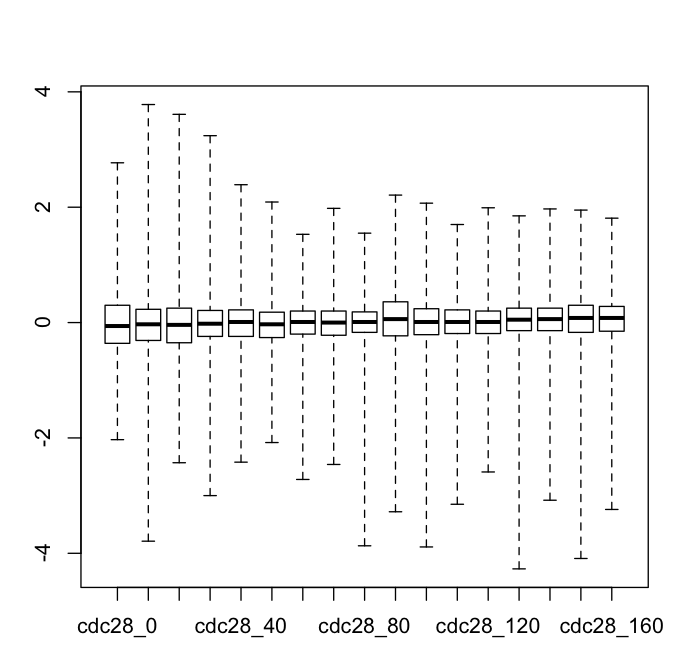

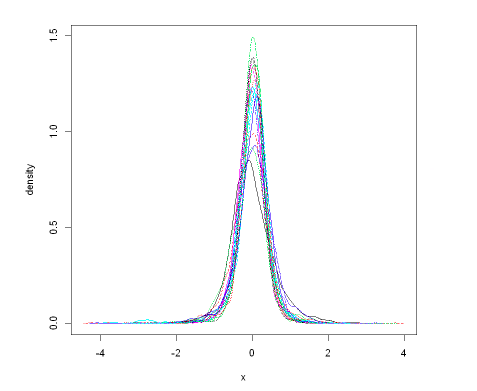

In [ ]:
plotDensity.AffyBatch(yeast)

In [ ]:
typeof(yeast)

> ！ 在画密度图的时候遇到的问题： yeast是一个s4类型的方法对象，无法将其转换为一个是矢量，无法画图

(5)将数据标准化，这里使用affyPLM包中的 normalize.ExpressionSet.quantiles函数

In [ ]:
yeast_norm <- normalize.ExpressionSet.quantile(yeast)

(6)再次执行规范化数据的质量评估

In [ ]:
plotDensity.AffyBatch(yeast_norm)
boxplot(yeast)

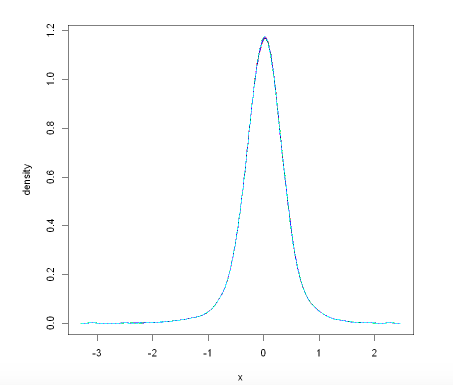

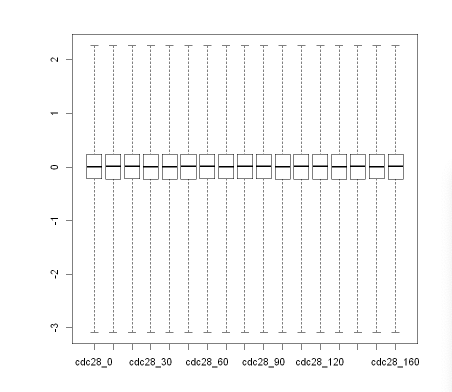

(7)若要检查数据的属性，请获取组件的详细信息:可以看到数据是16个大样本，从0到160的时间点开始
间隔为10个单位

In [ ]:
pData(yeast_norm)

(8) 设计矩阵可以创建一个时间序列将有
控件和时间点。
例如，对于每个控制和时间点(T1和T2)，如果有两个副本C，则使用以下命令:

In [ ]:
times <- pData(yeast_norm)$time
times <- as.factor(times)
design <- model.matrix(~0 +factor(pData(yeast_norm)$time))
colnames(design)[1:17] <- c("C", paste("T", 0:16, sep=""))

(9)创建一个对比矩阵，使用第0点作为参考和所有其他时间
点作为处理(通常对来自相同培养的样品)，

In [ ]:
cont <- makeContrasts(C-T1, C-T2, C-T3, C-T4, C-T5, C-T6, C-T7, 
C-T8, C-T9, C-T10, C-T11, C-T12, C-T13, C-T14, C-T15, C-T16, 
levels=design)

(10)现在，用这个矩阵来拟合线性模型，然后用eBayes函数来拟合
计算统计数字，如下:

In [ ]:
fit <- lmFit(yeast_norm, cont)
fitE <- eBayes(fit)

(11)然后利用topTable函数对排名最靠前的基因进行过滤，

In [ ]:
> x <- topTable(fitE, adjust="fdr", sort.by="F", number=100)
> x[x$adj.P.Val< 0.05,]

> 该方法的工作原理与前面所示的静态数据非常相似
配方。这里唯一的区别是我们在创建设计时使用了时间因素
对比矩阵。这种数据也可以简单地使用设计矩阵进行分析
条件和完整的数据。下图显示了酵母的对数倍变化
前六个基因在时间点上的数据显示出振荡:

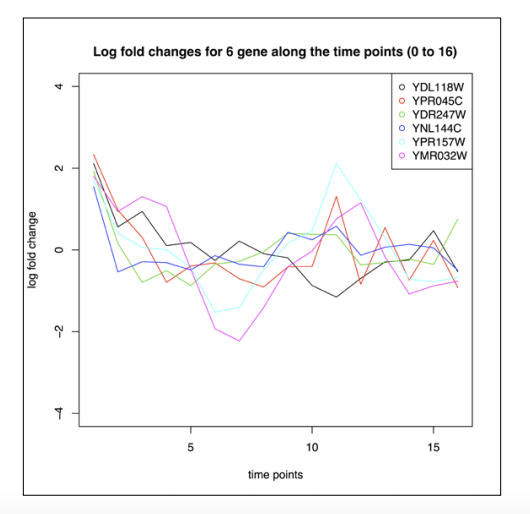

---

## 12.Fold changes in microarray data

- 折变是指最终值与初始值之比。在基因表达方面，可以定义为mRNA的最终定量与初始含量之比。
初期和末期可以是时间点，也可以是治疗和控制条件。
它代表的是变化，而不是一个模糊的绝对量。
有人提出，当从数据集中提取DE基因时，折叠变化可以作为更可重复的标识符。
此菜谱将解释如何使用折叠更改来实现此目的。

- 我们将继续使用白血病数据集进行我们的工作，在这里，我们直接使用来自发现差异表达基因配方的结果。
在这个配方中，我们将只使用所有类型白血病的结果de2

(1)利用limma分析的结果得到折变。
生成的表有一个与探测相关的折叠更改的列(这里显示了一个示例表)。
在本章中，请参考使用多个类recipe的数据来创建tested2对象。看看下面的对象:

In [2]:
library(leukemiasEset)
data(leukemiasEset)
pheno <- pData(leukemiasEset)
mydata <- leukemiasEset[, sampleNames(leukemiasEset)[c(1:3, 13:15, 25:27, 49:51)]]
design <- model.matrix(~0 + factor(pData(mydata)$LeukemiaType))
colnames(design) <- unique(as.character(pData(mydata)$LeukemiaType))
library(limma)
fit <- lmFit(mydata, design)
contrast.matrix <- makeContrasts(NoL- ALL, NoL- AML, NoL- CLL, levels = design)
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)
tested2 <- topTable(fit2,adjust="fdr",sort.by="B",number=Inf, coef=1)
DE2 <- tested2[tested2$adj.P.Val < 0.01,]

Loading required package: Biobase

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: BiocGenerics

Loading required package: parallel

Loading required package: parallel


Attaching package: ‘BiocGenerics’



Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

   

In [4]:
head(DE2)  #下面的屏幕截图显示的是排在前面的基因

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000152078,4.510507,4.856523,28.13988,4.463747e-11,9.004270e-07,14.01472
ENSG00000117519,-4.185175,4.791585,-22.73888,3.878292e-10,3.911645e-06,12.69738
ENSG00000145850,4.142236,4.507655,17.38636,5.759942e-09,2.925048e-05,10.72782
ENSG00000170180,5.681327,5.734169,17.37423,5.800214e-09,2.925048e-05,10.72231
ENSG00000087586,3.952183,5.720789,16.45393,9.977396e-09,3.111188e-05,10.28705
ENSG00000047597,5.362419,5.108415,16.32474,1.079114e-08,3.111188e-05,10.22315


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000152078,4.510507,4.856523,28.13988,4.463747e-11,9.004270e-07,14.01472
ENSG00000117519,-4.185175,4.791585,-22.73888,3.878292e-10,3.911645e-06,12.69738
ENSG00000145850,4.142236,4.507655,17.38636,5.759942e-09,2.925048e-05,10.72782
ENSG00000170180,5.681327,5.734169,17.37423,5.800214e-09,2.925048e-05,10.72231
ENSG00000087586,3.952183,5.720789,16.45393,9.977396e-09,3.111188e-05,10.28705
ENSG00000047597,5.362419,5.108415,16.32474,1.079114e-08,3.111188e-05,10.22315


(2)将相关列提取到前10,000个探测的单独数据框架中

In [8]:
fit <- eBayes(fit)
myTable <- topTable(fit, number=10000)

ERROR: Error in eBayes(fit): 没有"eBayes"这个函数


ERROR: Error in eBayes(fit): 没有"eBayes"这个函数


In [3]:
DE2 <- tested2[tested2$adj.P.Val < 0.01,]
logratio<- tested2$logFC

ERROR: Error in eval(expr, envir, enclos): 找不到对象'tested2'


ERROR: Error in eval(expr, envir, enclos): 找不到对象'tested2'


(3)折线变化为对数值，反之亦然;可以使用gtools库

In [15]:
library(gtools)

In [4]:
library(hexbin)
LR <- foldchange2logratio(foldchange, base=2)
FC <- logratio2foldchange(logratio, base=2)

ERROR: Error in foldchange2logratio(foldchange, base = 2): 没有"foldchange2logratio"这个函数


ERROR: Error in foldchange2logratio(foldchange, base = 2): 没有"foldchange2logratio"这个函数


(4)现在，将火山图中的log fold变化和p-value关系可视化如下:

In [6]:
plot(tested2$logFC, -log10(tested2$P.Value),xlim=c(-10, 10),  ylim=c(0, 15), xlab="log2 fold change", ylab="-log10 p-value")

ERROR: Error in plot(tested2$logFC, -log10(tested2$P.Value), xlim = c(-10, 10), : 找不到对象'tested2'


ERROR: Error in plot(tested2$logFC, -log10(tested2$P.Value), xlim = c(-10, 10), : 找不到对象'tested2'



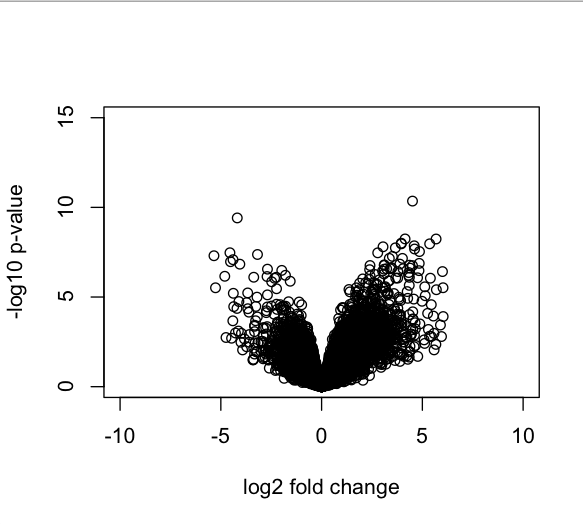

(5)当从limma生成的表中选择重要的基因时，使用log
折叠改变列作为选择差异表达的基因组合的另一标准

In [9]:
 myTable[tested2$P.Val< 0.05&tested2$logFC>1.5,]

ERROR: Error in eval(expr, envir, enclos): 找不到对象'myTable'


ERROR: Error in eval(expr, envir, enclos): 找不到对象'myTable'


---

## 12. The functional enrichment of data 

- 一旦我们从我们的阵列数据中知道DE基因，我们就有了所有在细胞中起作用的基因。
为了在生物学水平上对这组基因有更多的了解，我们需要了解它们在功能方面的生物学作用。 需要GO来分析富集基因|

(1)加载GOstats，和注释包hgu95av2

In [ ]:
library(GOstats)
library(biomaRt)
library(hgu95av2.db)

(2)准备白血病数据分析结果的输入数据
(多个类的数据)。

创建两个集合，一个集合由数据中的所有基因组成，另一个集合由DE基因组成，如下所示:

In [10]:
all_genes <- rownames(tested2)
sel_genes <- rownames(DE2)

ERROR: Error in rownames(tested2): 找不到对象'tested2'


ERROR: Error in rownames(tested2): 找不到对象'tested2'


(3)将这些基因集和他们的id整合

In [11]:
library(leukemiasEset)
data(leukemiasEset)
pheno <- pData(leukemiasEset)
mydata <- leukemiasEset[, sampleNames(leukemiasEset)[c(1:3, 13:15, 25:27, 49:51)]]
design <- model.matrix(~0 + factor(pData(mydata)$LeukemiaType))
colnames(design) <- unique(as.character(pData(mydata)$LeukemiaType))
library(limma)
fit <- lmFit(mydata, design)
contrast.matrix <- makeContrasts(NoL- ALL, NoL- AML, NoL- CLL, levels = design)
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)
tested2 <- topTable(fit2,adjust="fdr",sort.by="B",number=Inf, coef=1)
DE2 <- tested2[tested2$adj.P.Val < 0.01,]

Loading required package: Biobase

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: BiocGenerics

Loading required package: parallel

Loading required package: parallel


Attaching package: ‘BiocGenerics’



Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

   

In [12]:
all_genes <- rownames(tested2)
head(all_genes)

[1] "ENSG00000152078" "ENSG00000117519" "ENSG00000145850" "ENSG00000170180"
[5] "ENSG00000087586" "ENSG00000047597"

[1] "ENSG00000152078" "ENSG00000117519" "ENSG00000145850" "ENSG00000170180"
[5] "ENSG00000087586" "ENSG00000047597"

In [26]:
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))

ERROR: Error in useDataset("hsapiens_gene_ensembl", useMart("ensembl")): 没有"useDataset"这个函数


ERROR: Error in useDataset("hsapiens_gene_ensembl", useMart("ensembl")): 没有"useDataset"这个函数


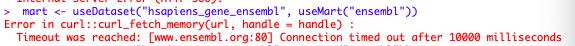

In [18]:
 all_genes <- c(getBM(filters= "ensembl_gene_id", attributes= c("entrezgene"), values= all_genes, mart= mart)) # get entrez ids for all genes

ERROR: Error in getBM(filters = "ensembl_gene_id", attributes = c("entrezgene"), : 没有"getBM"这个函数


ERROR: Error in getBM(filters = "ensembl_gene_id", attributes = c("entrezgene"), : 没有"getBM"这个函数


In [17]:
sel_genes <- c(getBM(filters= "ensembl_gene_id", attributes= c("entrezgene"), values= sel_genes, mart= mart)) # get entrez ids for DE

ERROR: Error in getBM(filters = "ensembl_gene_id", attributes = c("entrezgene"), : 没有"getBM"这个函数


ERROR: Error in getBM(filters = "ensembl_gene_id", attributes = c("entrezgene"), : 没有"getBM"这个函数


(4)为测试统计数据定义一个截止日期

In [19]:
hgCutoff <- 0.05

(5)接下来需要的是一个GOHyperGParams对象，它将被用作
富集计算的输入参数。

In [20]:
 params <- new("GOHyperGParams", geneIds=sel_genes, 
universeGeneIds= all_genes, annotation="hgu95av2.db", 
ontology="BP", pvalueCutoff=hgCutoff, conditional=FALSE, 
testDirection="over")

ERROR: Error in getClass(Class, where = topenv(parent.frame())): “GOHyperGParams” is not a defined class


ERROR: Error in getClass(Class, where = topenv(parent.frame())): “GOHyperGParams” is not a defined class


（6）有了GOHyperGParams对象后，执行超几何运算
测试得到的p-值为GO注释如下

In [22]:
hgOver <- hyperGTest(params)
summary(hgOver)

ERROR: Error in hyperGTest(params): 没有"hyperGTest"这个函数


ERROR: Error in hyperGTest(params): 没有"hyperGTest"这个函数


(7)得到与不同类别相关的基因数量如下:

In [23]:
geneCounts(hgOver)
universeCounts(hgOver)

ERROR: Error in geneCounts(hgOver): 没有"geneCounts"这个函数


ERROR: Error in geneCounts(hgOver): 没有"geneCounts"这个函数


(8)绘制GO图 DAG

In [29]:
library(Rgraphviz)    # `Rgraphviz` is used to show the DAG plot of GO enrichment
subhgOver <- subGraph(snodes=as.character(summary(hgOver)[1:9,1]), graph = goDag(hgOver))
plot(subhgOver)
plot(goDag(hgOver))

ERROR: Error in summary(hgOver): 找不到对象'hgOver'


ERROR: Error in summary(hgOver): 找不到对象'hgOver'


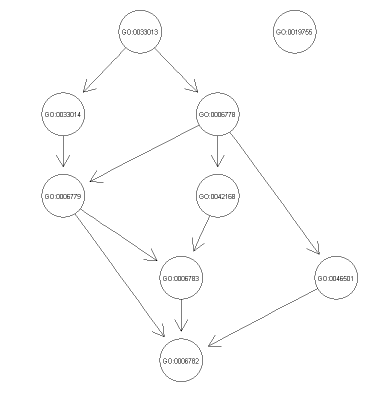

(9)最后，生成一个可以用任何浏览器读取的HTML文件，

In [27]:
 htmlReport(hgCondOver, file="ALL_hgco.html")

ERROR: Error in htmlReport(hgCondOver, file = "ALL_hgco.html"): 没有"htmlReport"这个函数


ERROR: Error in htmlReport(hgCondOver, file = "ALL_hgco.html"): 没有"htmlReport"这个函数


---

## 13.Clustering microarray data 聚类微阵列数据

- 聚类就是把相似的基因聚集在一个群体中(称为聚类)，然后离开来自其他类似的群体。当基因聚集在一起
，这意味着它们根据给定的表达式数据遵循相似的模式条件。该配方提出了基因层次聚类这一被广泛应用的概念表达分析。

(1)使用了标准化的乳腺癌的数据。

In [32]:
library(affy)
myData <- ReadAffy(celfile.path="/Users/luxuanyi/GSE24460_RAW")

In [36]:
library(Biobase)
DIR <- system.file("extdata", package="Biobase")
exprsLoc <- file.path(DIR, "exprsData.txt") 
pDataLoc <- file.path(DIR, "pData.txt")
DIR
exprsLoc
pDataLoc
exprs <- as.matrix(read.csv(exprsLoc, header = TRUE, sep = "\t", row.names = 1, as.is = TRUE))
pData <- read.table(pDataLoc, row.names = 1, header = TRUE, sep = "\t")
pData <- new("AnnotatedDataFrame", data = pData)
exData <- new("MIAME", name="ABCabc", lab="XYZ Lab", contact="abc@xyz", title="", abstract="", url="www.xyz")
eset <- new("ExpressionSet", exprs = exprs, phenoData = pData, experimentData = exData, annotation = "hgu133a2")

[1] "/Library/Frameworks/R.framework/Versions/3.6/Resources/library/Biobase/extdata"

[1] "/Library/Frameworks/R.framework/Versions/3.6/Resources/library/Biobase/extdata"

[1] "/Library/Frameworks/R.framework/Versions/3.6/Resources/library/Biobase/extdata/exprsData.txt"

[1] "/Library/Frameworks/R.framework/Versions/3.6/Resources/library/Biobase/extdata/exprsData.txt"

[1] "/Library/Frameworks/R.framework/Versions/3.6/Resources/library/Biobase/extdata/pData.txt"

[1] "/Library/Frameworks/R.framework/Versions/3.6/Resources/library/Biobase/extdata/pData.txt"

(2)从白血病数据创建用于集群的数据集。
仅使用前100个数据实例进行演示

In [34]:
c.data <- exprs(eset[1:100,])
head(c.data)

,A,B,C,D,E,F,G,H,I,J,⋯,Q,R,S,T,U,V,W,X,Y,Z
AFFX-MurIL2_at,192.7420,85.75330,176.7570,135.5750,64.49390,76.3569,160.5050,65.9631,56.9039,135.60800,⋯,179.8450,152.4670,180.83400,85.4146,157.98900,146.8000,93.8829,103.85500,64.4340,175.61500
AFFX-MurIL10_at,97.1370,126.19600,77.9216,93.3713,24.39860,85.5088,98.9086,81.6932,97.8015,90.48380,⋯,87.6806,108.0320,134.26300,91.4031,-8.68811,85.0212,79.2998,71.65520,64.2369,78.70680
AFFX-MurIL4_at,45.8192,8.83135,33.0632,28.7072,5.94492,28.2925,30.9694,14.7923,14.2399,34.48740,⋯,32.7911,33.5292,19.81720,20.4190,26.87200,31.1488,22.3420,19.01350,12.1686,17.37800
AFFX-MurFAS_at,22.5445,3.60093,14.6883,12.3397,36.86630,11.2568,23.0034,16.2134,12.0375,4.54978,⋯,15.9488,14.6753,-7.91911,12.8875,11.91860,12.8324,11.1390,7.55564,19.9849,8.96849
AFFX-BioB-5_at,96.7875,30.43800,46.1271,70.9319,56.17440,42.6756,86.5156,30.7927,19.7183,46.35200,⋯,58.6239,114.0620,93.44020,22.5168,48.64620,90.2215,42.0053,57.57380,44.8216,61.70440
AFFX-BioB-M_at,89.0730,25.84610,57.2033,69.9766,49.58220,26.1262,75.0083,42.3352,41.1207,91.53070,⋯,58.1331,104.1220,115.83100,58.1224,73.42210,64.6066,40.3068,41.82090,46.1087,49.41220


,A,B,C,D,E,F,G,H,I,J,⋯,Q,R,S,T,U,V,W,X,Y,Z
AFFX-MurIL2_at,192.7420,85.75330,176.7570,135.5750,64.49390,76.3569,160.5050,65.9631,56.9039,135.60800,⋯,179.8450,152.4670,180.83400,85.4146,157.98900,146.8000,93.8829,103.85500,64.4340,175.61500
AFFX-MurIL10_at,97.1370,126.19600,77.9216,93.3713,24.39860,85.5088,98.9086,81.6932,97.8015,90.48380,⋯,87.6806,108.0320,134.26300,91.4031,-8.68811,85.0212,79.2998,71.65520,64.2369,78.70680
AFFX-MurIL4_at,45.8192,8.83135,33.0632,28.7072,5.94492,28.2925,30.9694,14.7923,14.2399,34.48740,⋯,32.7911,33.5292,19.81720,20.4190,26.87200,31.1488,22.3420,19.01350,12.1686,17.37800
AFFX-MurFAS_at,22.5445,3.60093,14.6883,12.3397,36.86630,11.2568,23.0034,16.2134,12.0375,4.54978,⋯,15.9488,14.6753,-7.91911,12.8875,11.91860,12.8324,11.1390,7.55564,19.9849,8.96849
AFFX-BioB-5_at,96.7875,30.43800,46.1271,70.9319,56.17440,42.6756,86.5156,30.7927,19.7183,46.35200,⋯,58.6239,114.0620,93.44020,22.5168,48.64620,90.2215,42.0053,57.57380,44.8216,61.70440
AFFX-BioB-M_at,89.0730,25.84610,57.2033,69.9766,49.58220,26.1262,75.0083,42.3352,41.1207,91.53070,⋯,58.1331,104.1220,115.83100,58.1224,73.42210,64.6066,40.3068,41.82090,46.1087,49.41220


(3)进行聚类，使用EMA包

In [1]:
 library(EMA)







################################################################################


################################################################################


Easy Microarray Analysis


Easy Microarray Analysis


EMA stable version


EMA stable version


Current release : v1.4.4 - march 2014


Current release : v1.4.4 - march 2014


################################################################################


################################################################################




In [2]:
c.array <- clustering(data=c.data, metric="pearson", method="ward")  #数组聚类 c.data

ERROR: Error in is.data.frame(x): 找不到对象'c.data'


ERROR: Error in is.data.frame(x): 找不到对象'c.data'


(4)通过绘制集群如下图来创建集群的树状图

In [ ]:
plot(c.array)

(5)要对基因进行聚类，只需将数据矩阵进行转置并将其用作输入对于聚类函数中的数据参数，定义相似度.度量和聚类方法如下:

In [ ]:
c.gene <- clustering(data=t(c.data), metric="pearsonabs", method="ward")

In [ ]:
 plot(c.gene)

---

## 14.Getting a co-expression network from microarray data 微阵列的共表达网络

- 从基因表达数据生成的网络近年来呈上升趋势。
抽象层次上的网络代表了基因之间的关系
上的数据。
从数据中得出这些关系有许多可能的方法。我们将根据基因之间的相关性来探索它们之间的关系。

 (1)要使用WGCNA包生成共表达网络

In [ ]:
library(WGCNA)
library(RBGL)

(2)以数据集为例。在这个阶段最好只使用重要的基因
    因为它将减少噪音，同时消耗更少的时间.有50个基因用于演示。

In [6]:
library(affy)
library(affydata)
library(hgu133a2cdf)
myData_quantile <- normalize.ExpressionSet.quantiles(myData)
library(Biobase)
DIR <- system.file("extdata", package="Biobase")
exprsLoc <- file.path(DIR, "exprsData.txt") 
pDataLoc <- file.path(DIR, "pData.txt")
DIR
exprsLoc
pDataLoc
exprs <- as.matrix(read.csv(exprsLoc, header = TRUE, sep = "\t", row.names = 1, as.is = TRUE))
pData <- read.table(pDataLoc, row.names = 1, header = TRUE, sep = "\t")
pData <- new("AnnotatedDataFrame", data = pData)
exData <- new("MIAME", name="ABCabc", lab="XYZ Lab", contact="abc@xyz", title="", abstract="", url="www.xyz")
eset <- new("ExpressionSet", exprs = exprs, phenoData = pData, experimentData = exData, annotation = "hgu133a2")
eset

ERROR: Error in library(affydata): there is no package called ‘affydata’


ERROR: Error in library(affydata): there is no package called ‘affydata’


In [7]:
ibrary(leukemiasEset)
data(leukemiasEset)
pheno <- pData(leukemiasEset)
mydata <- leukemiasEset[, sampleNames(leukemiasEset)[c(1:3, 13:15, 25:27, 49:51)]]
mydata
design <- model.matrix(~0 + factor(pData(mydata)$LeukemiaType))
colnames(design) <- unique(as.character(pData(mydata)$LeukemiaType))
library(limma)
fit <- lmFit(mydata, design)
contrast.matrix <- makeContrasts(NoL- ALL, NoL- AML, NoL- CLL, levels = design)
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)
tested2 <- topTable(fit2,adjust="fdr",sort.by="B",number=Inf, coef=1)
DE2 <- tested2[tested2$adj.P.Val < 0.01,]

ERROR: Error in ibrary(leukemiasEset): 没有"ibrary"这个函数


ERROR: Error in ibrary(leukemiasEset): 没有"ibrary"这个函数


In [ ]:
 myData_Sel <- exprs(eset[rownames(DE2)[1:25],1:3]) #didn't work, have to follow the steps:

In [1]:
myData_S<- rownames(DE2)[1:25]  #firstly
myData_S

ERROR: Error in rownames(DE2): 找不到对象'DE2'


ERROR: Error in rownames(DE2): 找不到对象'DE2'


In [2]:
myData_Sel <- exprs(eset[1:25, 1:3])  #secondly

ERROR: Error in exprs(eset[1:25, 1:3]): 没有"exprs"这个函数


ERROR: Error in exprs(eset[1:25, 1:3]): 没有"exprs"这个函数


(3)数据的列中有样本名称，行中有基因。将数据转置

In [ ]:
myData_Sel <- t(myData_Sel)

(4)要计算邻接矩阵，可以运行相关计算

In [ ]:
 myMat <- adjacency(myData.Sel, type="signed")

>结果给出了一个大小等于基因数目的方阵。
矩阵中的每一项都是基因之间的连接性。

(4)结果邻接矩阵中的值可以设置为0(边缘缺失)或1
(边表示)通过二分法以不同的方式得到最终的邻接矩阵。
简单地使用一个0.90的阈值(一个高值来获得最多相关的顶点)，例如
这是最简单的方法之一，但不是最佳方法。具体做法如下:

In [ ]:
 adjMat <- myMat
 adjMat[abs(adjMat)>0.90] <- 1
 adjMat[abs(adjMat)<=0.90] <- 0
 diag(adjMat) <- 0

(5)最后的邻接矩阵可以转换成一个图元对象
以具有节点和边的图的形式呈现，如下所示(注意，要绘制
图可能需要一些时间，这取决于网络的大小):

In [3]:
library(Rgraphviz)    #makeNodeAttrs 函数在此包中

Loading required package: graph

Loading required package: graph

Loading required package: BiocGenerics

Loading required package: BiocGenerics

Loading required package: parallel

Loading required package: parallel


Attaching package: ‘BiocGenerics’



Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    any

In [1]:
myGraph <- as(adjMat, "graphNEL")
myGraph
plot(myGraph, nodeAttrs=makeNodeAttrs(myGraph,fontsize=28, fillcolor="grey"))

ERROR: Error in .class1(object): 找不到对象'adjMat'


ERROR: Error in .class1(object): 找不到对象'adjMat'


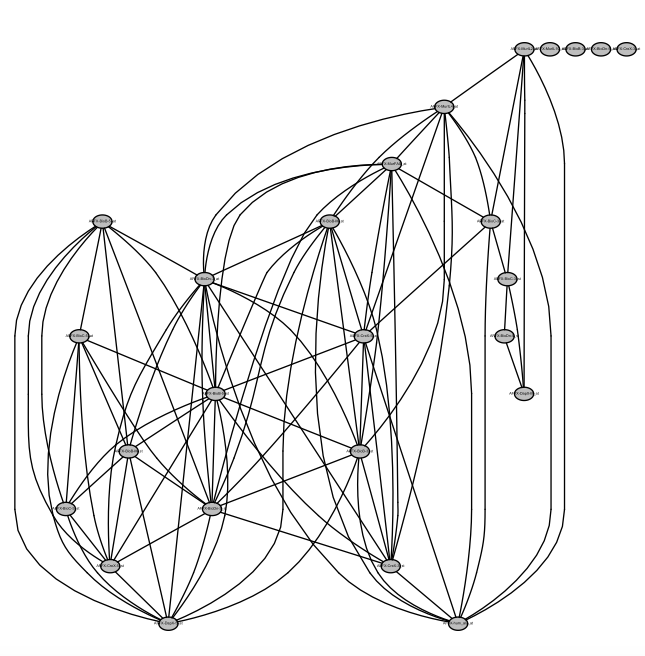

 >本配方中所述的方法是基于以相关性或相似性度量来计算基因之间的关系。
该函数根据表达数据计算基因之间的两两相似或相关，并将其作为矩阵返回。
阈值集只定义由网络边缘连接的高度相关或相似的基因，否则基因之间没有连接。
然后使用这个邻接矩阵获得图对象。

---

## 16.More visualizations for gene expression data  基因表达可视化

（1）把本章的数据和资源包全调出来

In [ ]:
library(affy)
library(affydata)
library(hgu133a2cdf)
library(EMA)
library(affy)
myData <- ReadAffy(celfile.path="/Users/luxuanyi/GSE24460_RAW")
library(Biobase)
DIR <- system.file("extdata", package="Biobase")
exprsLoc <- file.path(DIR, "exprsData.txt") 
pDataLoc <- file.path(DIR, "pData.txt")
DIR
exprsLoc
pDataLoc
exprs <- as.matrix(read.csv(exprsLoc, header = TRUE, sep = "\t", row.names = 1, as.is = TRUE))
pData <- read.table(pDataLoc, row.names = 1, header = TRUE, sep = "\t")
pData <- new("AnnotatedDataFrame", data = pData)
exData <- new("MIAME", name="ABCabc", lab="XYZ Lab", contact="abc@xyz", title="", abstract="", url="www.xyz")
eset <- new("ExpressionSet", exprs = exprs, phenoData = pData, experimentData = exData, annotation = "hgu133a2")
c.data <- exprs(eset[1:50,])
head(c.data)
c.array <- clustering(data=c.data, metric="pearson", method="ward")
c.array
c.gene <- clustering(data=t(c.data), metric="pearsonabs", method="ward")
c.gene

- 热图： From the *Clustering microarray data recipe*、 c.array 、 c.gene.

In [ ]:
library(EMA)
clustering.plot(tree=c.array, tree.sup=c.gene, data=c.data)

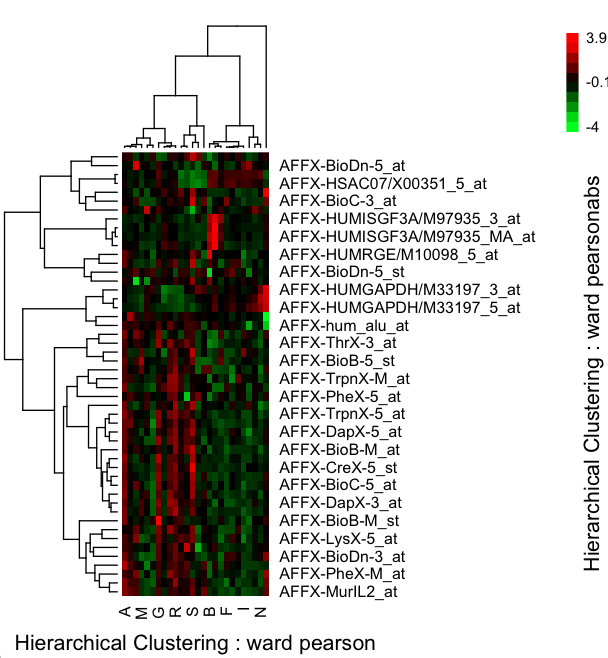

- 这样也可

In [ ]:
 heatmap(c.data)

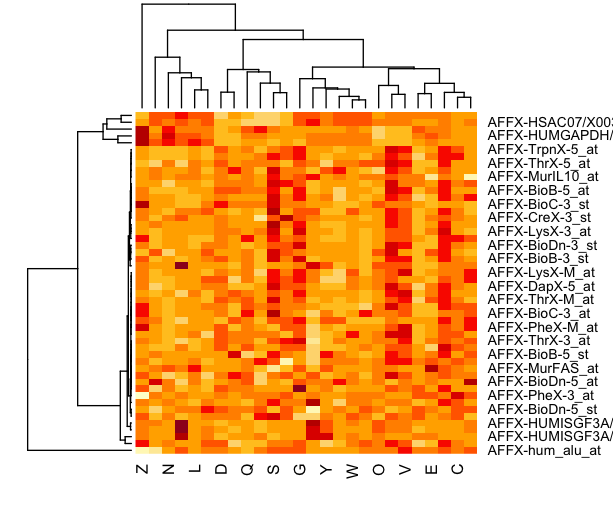

  > 上图显示了从白血病表达数据中选择基因的热图，
它的特点是正常细胞和不同类型的白血病。

---

- Venn diagram ：下一个要创建的图是维恩图。
它可以用来显示两个变量的通用和惟一内容。
这将需要以下的VennDiagram库，可以按如下方式安装和加载:

In [ ]:
BiocManager::install("VennDiagram")
library(VennDiagram)

- 现在，创建由五个变量(作为集合)组成的人工数据，作为一个命名列表
输入以下命令:

In [ ]:
set <- list()

for(i in 1:5){
 set[[i]]=sample(LETTERS[1:20], replace=TRUE, prob=rep(0.05,20))
}
names(set)=c(paste("S", 1:5, sep=""))

- 要绘制维恩图，请使用在列表集和create中创建的5个集合
gList对象如下:

In [ ]:
venn.plot <- venn.diagram(x = set, filename = NULL, cat.cex = 1.5, alpha = 0.50, col = "black",
                          fill = c("dodgerblue","goldenrod1", "darkorange1", "seagreen3", "orchid3"),
                          cex= c(1.5, 1.5, 1.5, 1.5, 1.5, 1, 0.8, 1, 0.8, 1, 0.8, 1, 0.8, 1, 0.8,
                                 1, 0.55, 1, 0.55, 1, 0.55, 1, 0.55, 1, 0.55, 1, 1, 1, 1, 1, 1.5),
                          cat.col = c("dodgerblue", "goldenrod1", "darkorange1","seagreen3", "orchid3"),
                          cat.fontface = "bold", margin = 0.05)

- Create the plot onto a PDF file using the grid.draw function as follows:

In [ ]:
pdf("venn.pdf")
grid.draw(venn.plot)
grid.draw(venn.plot)

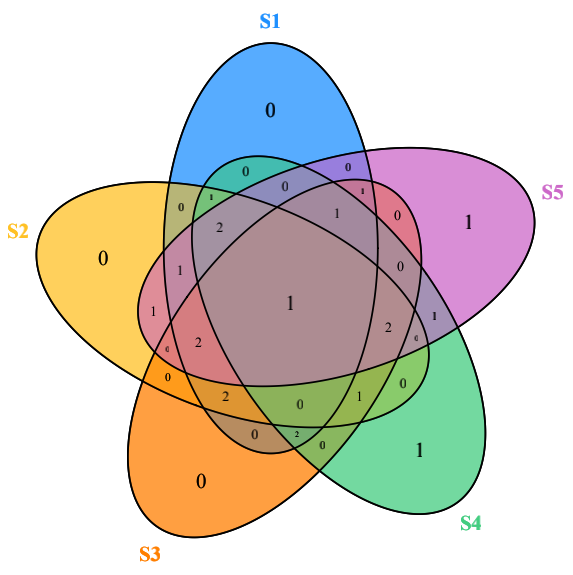

---

- 火山图： 火山图是用来绘制褶皱变化和p值之间的关系. ggplot2

In [ ]:
 library(ggplot2)
 head(tested2) #选择排在最前的基因当作数据框

- 使用阈值的p值和对数变化来定义颜色在图中如下:

In [ ]:
 threshold <- as.factor(tested2$logFC>1.5 &tested2$P.Value< 0.1)

In [ ]:
g <- ggplot(data = tested2, aes (x= logFC, y = -log10(P.Value), colour =threshold)) +geom_point() +opts(legend.position = "right") +xlab("log2 fold change") + ylab("-log10 p-value")

# opts被ggplot2包淘汰。。

本应该是这样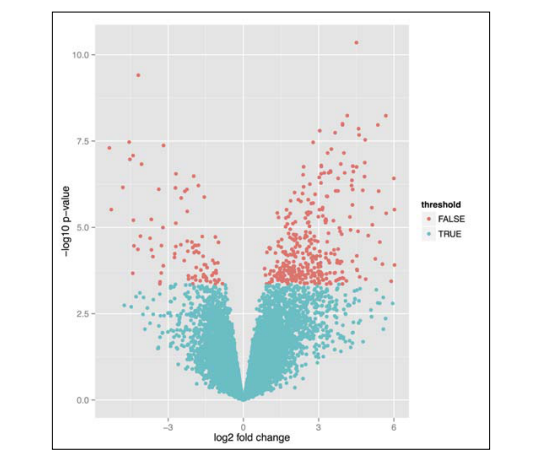

